Phys2600 - Assignment 2\
Calvin Bales\
Collaborated with Erin Morissette

I used the Particle 1D and LogisticMap.py codes that Prof. Plumb provided. They are at the bottom of this document.

Problem 1 - Write a program to calculate and compare the behavior of two, nearly identical, non-linear pendulums. Use it to calculate the divergence of two nearby trajectories $(\Delta\theta)$ in the chaotic regime and make a qualitative estimate of the corresponding Lyapunov exponent from the slope of a plot of log $(\Delta\theta)$ as a function of $t$. Reasonable parameters to place the pendulum in the chaotic regime are: $l=g= 9.8$, $\Omega_D= 0.6$, $F_D= 1.1$, $\nu= 0.5$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Particle1D_2 import Pendulum

In [2]:
import matplotlib 
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16

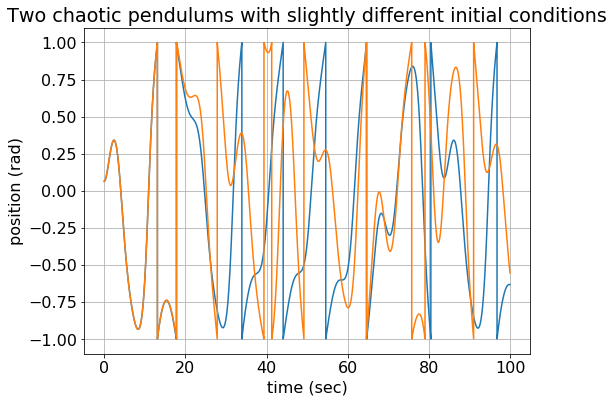

In [74]:
p = Pendulum(l=9.8, nu=0.5, omega_d=0.6, Fd=1.1, x0 = 0.2, tf = 100, dt = 0.005)
p1 = Pendulum(l=9.8, nu=0.5, omega_d=0.6, Fd=1.1, x0 = 0.201, tf = 100, dt = 0.005)
p.scipy_trajectory()
p1.scipy_trajectory()
plt.plot(p.tarray, p.xv[:,0]/np.pi)
plt.plot(p1.tarray, p1.xv[:,0]/np.pi)
plt.xlabel("time (sec)")
plt.ylabel("position (rad)")
plt.title("Two chaotic pendulums with slightly different initial conditions")
plt.grid()

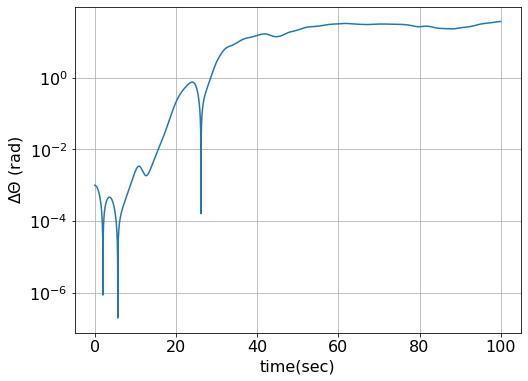

In [77]:
p.scipy_lyaponov()
p1.scipy_lyaponov()
diff_pos = abs(p.xv[:,0]-p1.xv[:,0])
plt.plot(p.tarray, diff_pos)
plt.yscale("log")
plt.xlabel("time(sec)")
plt.ylabel("$\Delta \Theta$ (rad)")
plt.grid()

The slope on the plot above is positive which means that the lyaponov exponent is also positive which means it's in a chaotic regime. 

Problem 2 -  (a) Calculate Poincare sections for the pendulum as it undergoes the period-doubling route to chaos. Plot $\omega$ versus $\theta$, with one point plotted for each drive cycle. Do this for $F_D=1.4, 1.44, 1.465, 1.481,$ and $1.49$ using the parameters $l=g= 9.8$, $\Omega_D= 2/3$, $\nu= 0.5$, $\omega(0) = 0$ and $\theta(0) = 0.2$. You should find that the attractor in the period-1  regime  will  contain  only  a  single  point.  Likewise,  if  the  behavior  is  period $n$ the attractor will contain $n$ discrete points. Be careful to remove the points corresponding to  the  initial  transient.  You  must  also  be  careful  to  account  for  the  fact  that  time increases in discrete steps of $\Delta t$, so you will actually extract points for your Poincare section when $|t−2\pi n/\Omega_D|<\Delta t/2$. Use a step size of $\Delta t= 0.005$ or smaller for this problem.

Text(0, 0.5, 'position (rad)')

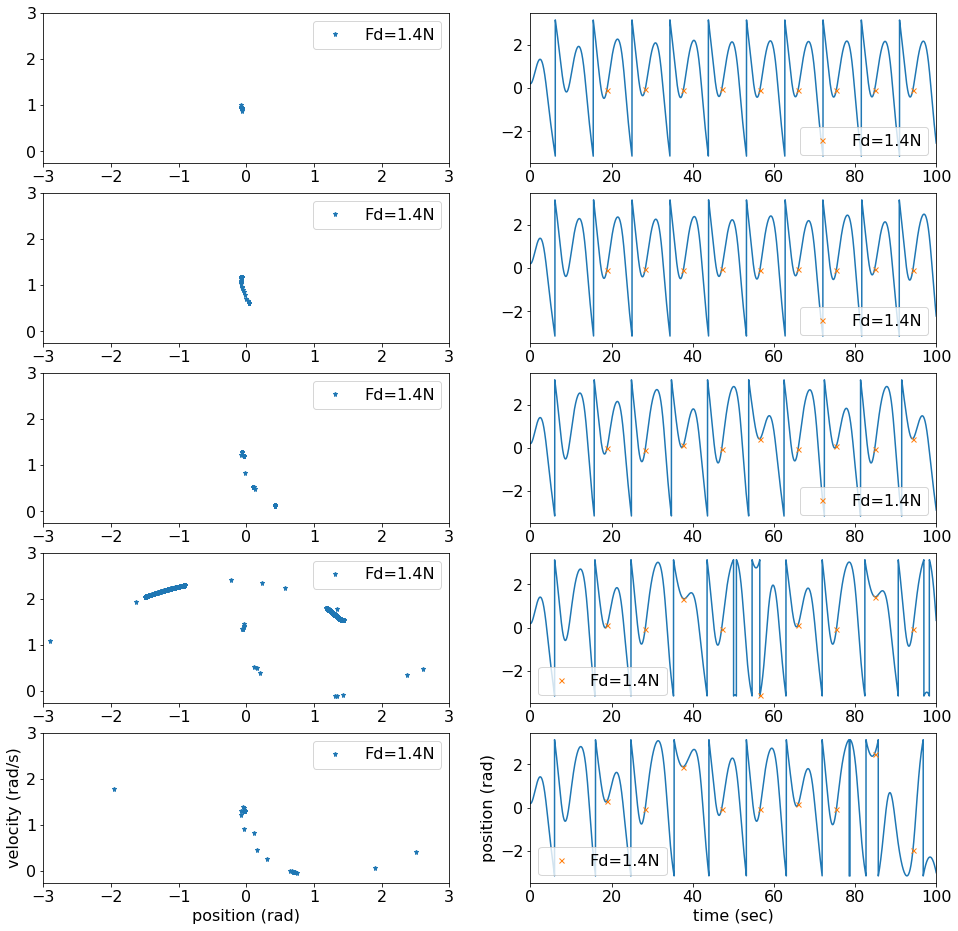

In [25]:
fig = plt.figure(figsize = [16,16])
axs = fig.subplots(5,2)

Fds=[1.4,1.44,1.465,1.481,1.49]
for ii in range(len(Fds)):
    p = Pendulum(l=9.8, nu=0.5, omega_d=2/3, Fd=Fds[ii], x0 = 0.2, tf = 10000, dt = 0.005)
    p.scipy_trajectory()
    p.poincare()
    
    axs[ii,0].plot(p.pc_x, p.pc_v, '*',label = "Fd="+str(F)+"N", markersize=5, linestyle="none")
    axs[ii,0].legend()
    axs[ii,0].set_ylim(-0.25,3)
    axs[ii,0].set_xlim(-3, 3)
    axs[ii,1].plot(p.tarray, p.xv[:,0])
    axs[ii,1].plot(p.pc_t, p.pc_x, 'x',label = "Fd="+str(F)+"N", markersize=5, linestyle="none")
    axs[ii,1].set_xlim(0, 100)
    axs[ii,1].legend()
    
axs[ii,0].set_xlabel("position (rad)")
axs[ii,0].set_ylabel("velocity (rad/s)")
axs[ii,1].set_xlabel("time (sec)")
axs[ii,1].set_ylabel("position (rad)")

I was unable to run these for a long time because my computer is not what it used to be so the poincare plots for the more chaotic regions are not filled in as much as I would like them to be.

Problem 3 - The logistic map undergoes successive period doubling as $\mu$ is increased from below 3  and  finally  develops  fully  chaotic  behavior  at $\mu\approx 3.56$.  Compute  the  bifurcation diagram for the logistic map. Use numerical results for the logistic map to estimate the value of the Feigenbaum parameter $\delta$ and compare it with the value for the pendulum $\delta\approx 4.669$. You should be able to get a fairly good estimate if you look at the first eight bifurcations.

In [3]:
import LogisticMap as lm

In [66]:
# Generate a bifrucation diagram
mu_start = 0
mu_stop = 4
mu_steps = 1000

x0 = 0.8

# Generate an array of mu values
mus = np.linspace(mu_start, mu_stop, mu_steps)
  
# containers for mu values and logistic map values
delta = []
m_matrix = np.zeros((len(mus), 1000))
mu_matrix = np.zeros((len(mus), 1000))
unique_m = []
bifurcate = []

i=0
n=2
# loop over the mu values
for mu in mus:
    # generate a time trace for the logistic map at a given mu
    m = lm.LogisticMap(x0, mu = mu)
    
    # initialize method removes transient
    m.initialize(100)
    m.iterate(1000)
        
    # convert list to numpy array object
    m_points = np.array(m.xList)
    
    #!!!!!ADD YOUR CODE HERE to select key points from time trace here
    mu_matrix[i,:len(np.unique(m_points))] = mu
    m_matrix[i,:len(np.unique(m_points))] = np.unique(m_points)
    unique_m=np.unique(m_points)
    #print(m_matrix)

    if len(unique_m) == n and i<mu_steps-1:
        if abs(unique_m[0]-unique_m[-1])>0.05:
            bifurcate.append(mu)
            n = n*2
    i+=1

print(bifurcate)
delta = (bifurcate[-2]-bifurcate[-3])/(bifurcate[-1]-bifurcate[-2])
print(delta)

[3.039039039039039, 3.4714714714714714, 3.5515515515515514]
5.400000000000002


Text(0.5, 1.0, 'Logic map')

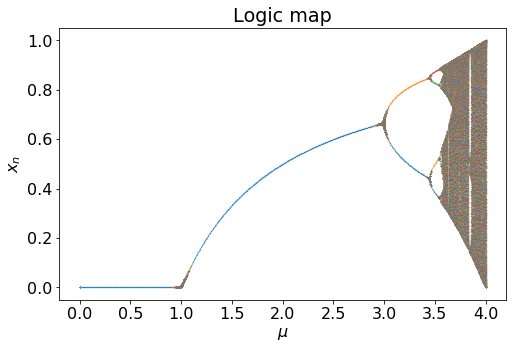

In [67]:
fig = plt.figure(figsize = [8,5])
plt.plot(mu_matrix, m_matrix,'.', markersize = 0.5)
plt.xlabel('$\mu$')
plt.ylabel('$x_n$')
plt.title("Logic map")

(0.4, 0.6)

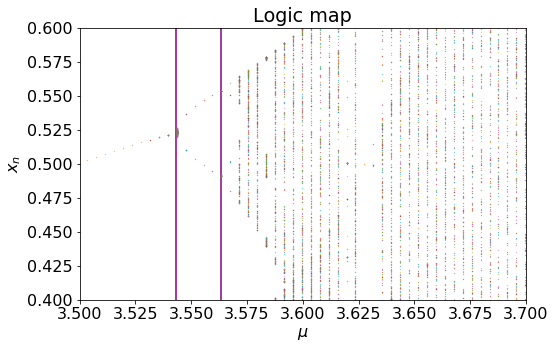

In [68]:
fig = plt.figure(figsize = [8,5])
plt.plot(mu_matrix, m_matrix,'.', markersize = 0.5)
plt.xlabel('$\mu$')
plt.ylabel('$x_n$')
plt.title("Logic map")
plt.vlines(x = 3.543, ymin=0, ymax=1, colors = 'purple', label = 'vline_multiple - full height')
plt.vlines(x = 3.5635, ymin=0, ymax=1, colors = 'purple', label = 'vline_multiple - full height')
plt.xlim(3.5,3.7)
plt.ylim(0.4, 0.6)

In [22]:
# Generate a bifrucation diagram zoomed in once
mu_start = 3.523
mu_stop = 3.7
mu_steps = 1000

x0 = 0.8

# Generate an array of mu values
mus = np.linspace(mu_start, mu_stop, mu_steps)
  
# containers for mu values and logistic map values
m_matrix = np.zeros((len(mus), 1000))
mu_matrix = np.zeros((len(mus), 1000))
unique_m = []

i=0
n=2
# loop over the mu values
for mu in mus:
    # generate a time trace for the logistic map at a given mu
    m = lm.LogisticMap(x0, mu = mu)
    
    # initialize method removes transient
    m.initialize(100)
    m.iterate(1000)
        
    # convert list to numpy array object
    m_points = np.array(m.xList)
    
    #!!!!!ADD YOUR CODE HERE to select key points from time trace here
    mu_matrix[i,:len(np.unique(m_points))] = mu
    m_matrix[i,:len(np.unique(m_points))] = np.unique(m_points)
    unique_m=np.unique(m_points)
    i+=1

(0.45, 0.525)

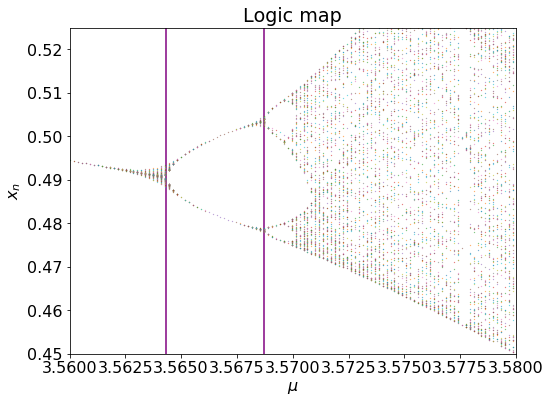

In [40]:
plt.plot(mu_matrix, m_matrix,'.', markersize = 0.5)
plt.xlabel('$\mu$')
plt.ylabel('$x_n$')
plt.title("Logic map")
plt.vlines(x = 3.5687, ymin=0, ymax=1, colors = 'purple', label = 'vline_multiple - full height')
plt.vlines(x = 3.5643, ymin=0, ymax=1, colors = 'purple', label = 'vline_multiple - full height')
plt.xlim(3.56, 3.58)
plt.ylim(0.45, 0.525)

In [41]:
# Generate a bifrucation diagram zoomed in twice
mu_start = 3.56
mu_stop = 3.58
mu_steps = 1000

x0 = 0.8

# Generate an array of mu values
mus = np.linspace(mu_start, mu_stop, mu_steps)
  
# containers for mu values and logistic map values
m_matrix = np.zeros((len(mus), 1000))
mu_matrix = np.zeros((len(mus), 1000))
unique_m = []

i=0
n=2
# loop over the mu values
for mu in mus:
    # generate a time trace for the logistic map at a given mu
    m = lm.LogisticMap(x0, mu = mu)
    
    # initialize method removes transient
    m.initialize(100)
    m.iterate(1000)
        
    # convert list to numpy array object
    m_points = np.array(m.xList)
    
    #!!!!!ADD YOUR CODE HERE to select key points from time trace here
    mu_matrix[i,:len(np.unique(m_points))] = mu
    m_matrix[i,:len(np.unique(m_points))] = np.unique(m_points)
    unique_m=np.unique(m_points)
    i+=1

(0.49, 0.51)

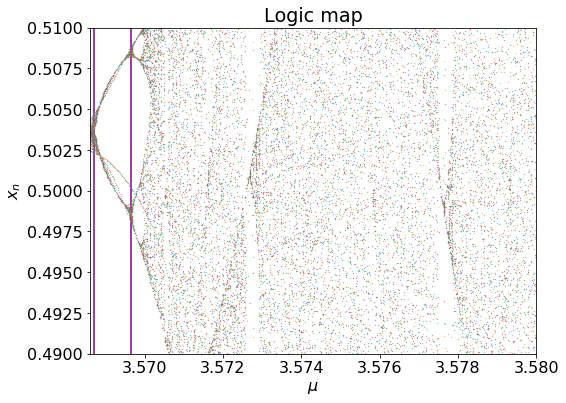

In [52]:
plt.plot(mu_matrix, m_matrix,'.', markersize = 0.5)
plt.xlabel('$\mu$')
plt.ylabel('$x_n$')
plt.title("Logic map")
plt.vlines(x = 3.5687, ymin=0, ymax=1, colors = 'purple', label = 'vline_multiple - full height')
plt.vlines(x = 3.56965, ymin=0, ymax=1, colors = 'purple', label = 'vline_multiple - full height')
plt.xlim(3.5686, 3.58)
plt.ylim(0.49, 0.51)

In [78]:
# Generate a bifrucation diagram zoomed in twice
mu_start = 3.5696
mu_stop = 3.58
mu_steps = 1000

x0 = 0.8

# Generate an array of mu values
mus = np.linspace(mu_start, mu_stop, mu_steps)
  
# containers for mu values and logistic map values
m_matrix = np.zeros((len(mus), 1000))
mu_matrix = np.zeros((len(mus), 1000))
unique_m = []

i=0
n=2
# loop over the mu values
for mu in mus:
    # generate a time trace for the logistic map at a given mu
    m = lm.LogisticMap(x0, mu = mu)
    
    # initialize method removes transient
    m.initialize(100)
    m.iterate(1000)
        
    # convert list to numpy array object
    m_points = np.array(m.xList)
    
    #!!!!!ADD YOUR CODE HERE to select key points from time trace here
    mu_matrix[i,:len(np.unique(m_points))] = mu
    m_matrix[i,:len(np.unique(m_points))] = np.unique(m_points)
    unique_m=np.unique(m_points)
    i+=1

(0.495, 0.501)

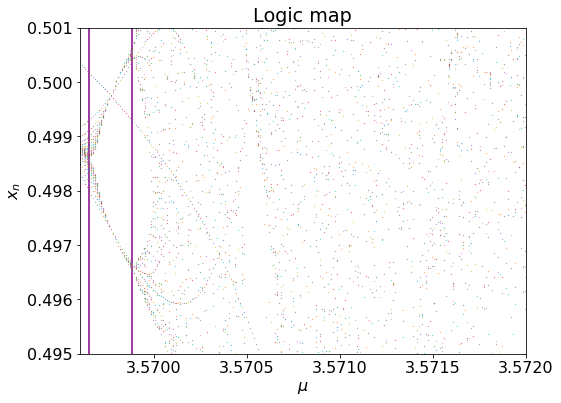

In [90]:
plt.plot(mu_matrix, m_matrix,'.', markersize = 0.5)
plt.xlabel('$\mu$')
plt.ylabel('$x_n$')
plt.title("Logic map")
plt.vlines(x = 3.56988, ymin=0, ymax=1, colors = 'purple', label = 'vline_multiple - full height')
plt.vlines(x = 3.56965, ymin=0, ymax=1, colors = 'purple', label = 'vline_multiple - full height')
plt.xlim(3.5696, 3.572)
plt.ylim(0.495, 0.501)

bifurcation points: \
1) $\mu = 3$ \
2) $\mu = 3.449$ \
3) $\mu = 3.543$ \
4) $\mu = 3.5643$ \
5) $\mu = 3.5687$ \
6) $\mu = 3.56965$ \
7) $\mu = 3.56988$ \

In [93]:
#Feigenbaum parameter with bifurcation numbers n=6, n+1=7, n-1=5
feig = (3.56965-3.5687)/(3.56988-3.56965)
print("Feigenbaum parameter =", feig)

Feigenbaum parameter = 4.130434782613564


In [95]:
#Feigenbaum parameter with bifurcation numbers n=5, n+1=6, n-1=4
feig = (3.5687-3.5643)/(3.56965-3.5687)
print("Feigenbaum parameter =", feig)

Feigenbaum parameter = 4.631578947368815


I found the Feigenbaum parameter in the least graceful way possible by zooming in on the sections where I saw bifurcations and then picking out the points using a verticle line and my eyeballs. 

The Feigenbaum parameter gets farther way from what it is supposed to be when I used larger bifurcations. I think this may have to do with the way that python holds large numbers. Maybe it's rounding is off which is making the numbers that I gather not exactly what they should be and so the Feigenbaum parameter is not be calculated with the actual bifurcation points so its no longer accurate. 

Problem 4- Use  numpy’s  Fast  Fourier  transformroutines to calculate the power spectrum and examine the behaviour of the nonlinearpendulum in the frequency domain. Use the following parameters $l=g= 9.8$, $\Omega_D=2/3$,$\nu= 0.5$ for this problem.

a) Analyze  the  behavior  in  the  period-4  regime  $(F_D\approx 1.465)$  and  show  that  the spectral component of $\omega(t)$ with the lowest frequency has a frequency of one-fourth the drive frequency.

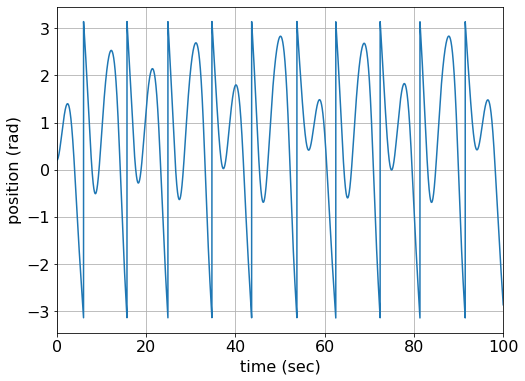

In [97]:
tf = 1000
dt = 0.005
p = Pendulum(l=9.8, nu=0.5, omega_d=2/3, Fd=1.465, x0 = 0.2, tf = tf, dt = dt)
p.scipy_trajectory()
plt.plot(p.tarray, p.xv[:,0])
plt.xlim(0,100)
plt.xlabel("time (sec)")
plt.ylabel("position (rad)")
plt.grid()

In [98]:
fftt = np.fft.fft(p.xv[:,0])/(len(p.xv[:,0]/2))
fftt[0]=fftt[1]
max_freq = int(1/dt)
num_pnts = int(tf/dt)
freq = np.linspace(0, max_freq, num_pnts)*(2*np.pi)/(2/3)

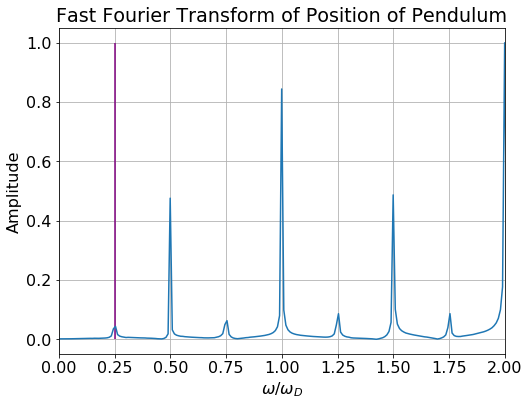

In [99]:
plt.plot(freq, abs(fftt)/max(abs(fftt[:1000])))
plt.xlim(0, 2)
plt.vlines(x = 0.25, ymin=0, ymax=1, colors = 'purple', label = 'vline_multiple - full height')
plt.xlabel("$\omega$/$\omega_D$")
plt.ylabel("Amplitude")
plt.title("Fast Fourier Transform of Position of Pendulum")
plt.grid()

Purple line is at $\Omega_D/4$ (one fourth the driving frequency which is also at the lowest peak in the FFT.

Text(0, 0.5, 'Amplitude')

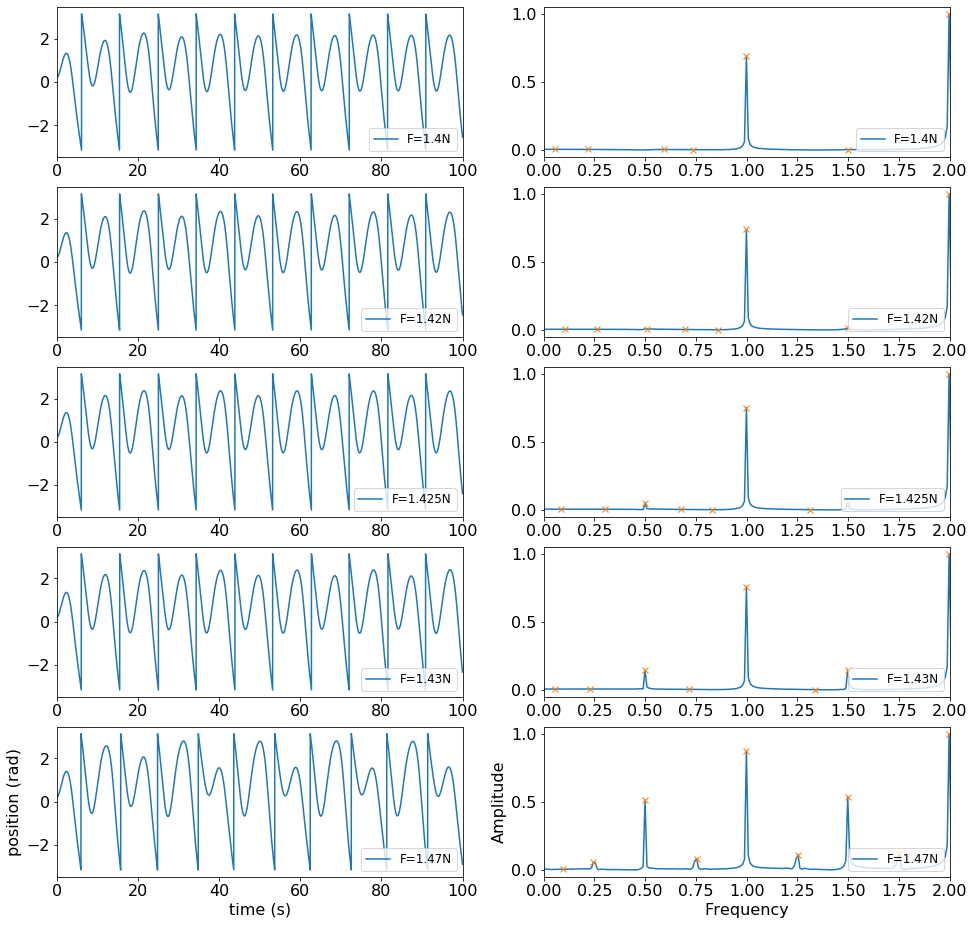

In [289]:
fig = plt.figure(figsize = [16,16])
axs = fig.subplots(5,2)
    
#axs = list(axs.flatten())

Fds=[1.4,1.42,1.425,1.43,1.47]
for ii in range(len(Fds)):
    p = Pendulum(l=9.8, nu=0.5, omega_d=2/3, Fd=Fds[ii], x0 = 0.2, tf = 1000, dt = 0.005)
    p.scipy_trajectory()
    fft = np.fft.fft(p.xv[:,1])/(len(p.xv[:,0]/2))

    fftt = np.fft.fft(p.xv[:,0])/(len(p.xv[:,0]/2))
    fftt[0]=fftt[1]
    max_freq = int(1/dt)
    num_pnts = int(tf/dt)
    freq = np.linspace(0, max_freq, num_pnts)*(2*np.pi)/(2/3) #normalize by driving frequency 
    q = abs(fftt)/max(abs(fftt[:1000]))
    
    d = 1.5/(2/3)*(2*np.pi)
    peaks,_ = find_peaks(q, distance=d)
    peaks = np.array(peaks)
    
    axs[ii,0].plot(p.tarray, p.xv[:,0], label = "F="+str(Fds[ii])+"N")
    axs[ii,0].legend(loc = 4,fontsize = 12)
    axs[ii,0].set_xlim(0,100)
    
    axs[ii,1].plot(freq, q, label = "F="+str(Fds[ii])+"N")
    axs[ii,1].plot(freq[peaks], q[peaks], "x")
    axs[ii,1].legend(loc = 4,fontsize = 12)
    axs[ii,1].set_xlim(0,2)
    
axs[ii,0].set_xlabel('time (s)')
axs[ii,0].set_ylabel('position (rad)')
axs[ii,1].set_xlabel('Frequency')
axs[ii,1].set_ylabel('Amplitude')

Here we can start to see the harmonics show up as we cross the period doubling points. We see two of them begin to form around F=1.42 and then four more appear between F=1.46 and F=1.47.

b) The bifurcation diagrams we examined in class showed that every time a period doubling  threshold  is  crossed,  a  new  subharmonic  component  is  added  to  the $\omega(t)$ waveform.  The  size  of  this  component  can  be  extracted  using  a  Fourier  transform. Calculate $\omega(t)$ for the values of $F_D$ between 1.4 and 1.47, near the period-2 transition. Extract the amplitude of the period-2 component as a function of $F_D$ from the power spectra of these time series. Try to determine the functional form that describes the way in which the amplitude vanishes at the transition.

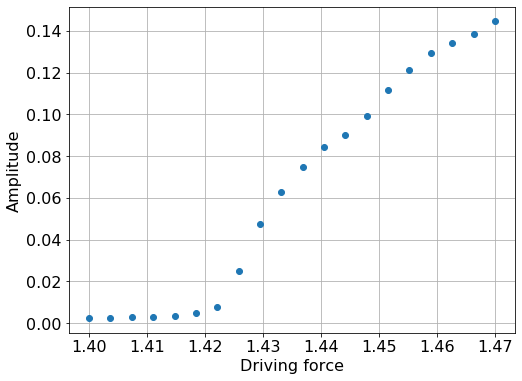

In [105]:
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

tf = 1000
dt = 0.005
ampli = []

Fd_list = np.linspace(1.4, 1.47, 20)
for f in Fd_list:
    p = Pendulum(l=9.8, nu=0.5, omega_d=2/3, Fd=f, x0 = 0.2, tf = tf, dt = dt)
    p.scipy_trajectory()
    fft = np.fft.fft(p.xv[:,1])/(len(p.xv[:,0]/2))

    max_freq = int(1/dt)
    num_pnts = int(tf/dt)
    freq = np.linspace(0, max_freq, num_pnts)*(2*np.pi)/(2/3) #normalize by driving frequency
    q = abs(fft)
    index = int(0.5*((num_pnts)/(max_freq*2*np.pi/(2/3))))
    ampli.append(q[index])

plt.plot(Fd_list, ampli, "o")   
plt.xlabel("Driving force")
plt.ylabel("Amplitude")
plt.title("")
plt.grid()

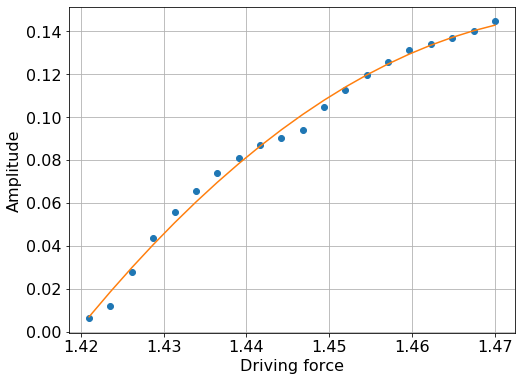

In [104]:
# def func(x, a, b, c):
#     return a*np.log(b*x)+c

def func(x, a, b, c):
    return a*x**2+b*x+c 

popt, pcov = curve_fit(func, Fd_list, ampli)
plt.plot(Fd_list, ampli, "o") 
plt.plot(Fd_list, func(Fd_list, *popt))
plt.xlabel("Driving force")
plt.ylabel("Amplitude")
plt.title("")
plt.grid()

In [103]:
print(popt)

[-38.0259793  112.70706634 -83.36625531]


The function that I was able to fit to this curve is $$y=-38.0259793x^2+112.70706634x-83.36625531$$ I think in reality it's not a polinomial but maybe a log function but the log was plotting as a straight line on my linear axes while I was able to get a polynomial to fit nicely. I also excluded from my fit the first few points before the period-2 peaks start to appear because since it was a flat line, it through off the fitting. 